### 스윈 트랜스포머 실습

In [1]:
!pip install tfswin

  Preparing metadata (setup.py) ... done
  Created wheel for tfswin: filename=tfswin-3.4.0-py3-none-any.whl size=19718 sha256=d7ebdc72bd03a74316ad1b09c14e29a509b587b1f2fbe5e01006701598158c59
  Stored in directory: /root/.cache/pip/wheels/4d/ef/14/d605174a5ebe0f9c9fc6d96e6e9f6e4f0187eab6457934fd15
Successfully built tfswin


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tfswin import SwinTransformerTiny224, preprocess_input
import matplotlib.pyplot as plt

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar100.load_data()
num_classes = 100

169001437/169001437 [==============================] - 4s 0us/step


In [4]:
inputs = layers.Input(shape=(32, 32, 3), dtype='uint8')
outputs = layers.Lambda(preprocess_input)(inputs)
outputs = SwinTransformerTiny224(include_top=False)(outputs)
outputs = layers.Dense(num_classes, activation='softmax')(outputs)

swin = models.Model(inputs=inputs, outputs=outputs)

177485300/177485300 [==============================] - 2s 0us/step


In [5]:
optimizer = tf.keras.optimizers.AdamW()

swin.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(1, name="accuracy"),
             tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy")])

In [6]:
history = swin.fit(x=train_x, y=train_y, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 100s 162ms/step - loss: 3.8475 - accuracy: 0.1075 - top-5-accuracy: 0.2985 - val_loss: 2.6767 - val_accuracy: 0.2916 - val_top-5-accuracy: 0.6316
Epoch 2/10
313/313 [==============================] - 44s 140ms/step - loss: 2.3017 - accuracy: 0.3809 - top-5-accuracy: 0.7200 - val_loss: 2.0282 - val_accuracy: 0.4482 - val_top-5-accuracy: 0.7722
Epoch 3/10
313/313 [==============================] - 48s 155ms/step - loss: 1.7237 - accuracy: 0.5143 - top-5-accuracy: 0.8303 - val_loss: 1.8906 - val_accuracy: 0.4821 - val_top-5-accuracy: 0.8025
Epoch 4/10
313/313 [==============================] - 43s 138ms/step - loss: 1.3484 - accuracy: 0.6062 - top-5-accuracy: 0.8919 - val_loss: 1.8152 - val_accuracy: 0.5125 - val_top-5-accuracy: 0.8175
Epoch 5/10
313/313 [==============================] - 42s 135ms/step - loss: 1.0343 - accuracy: 0.6866 - top-5-accuracy: 0.9331 - val_loss: 1.8606 - val_accuracy: 0.5130 - val_top-5-accuracy: 0.8155
Epoc

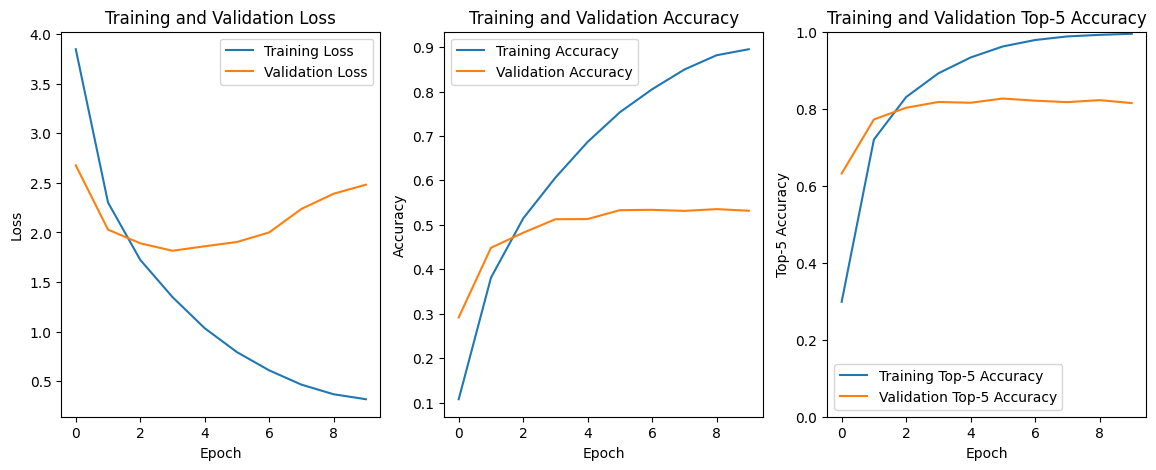

In [7]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['top-5-accuracy'], label='Training Top-5 Accuracy')
plt.plot(history.history['val_top-5-accuracy'], label='Validation Top-5 Accuracy')
plt.title('Training and Validation Top-5 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Top-5 Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [8]:
swin.evaluate(test_x, test_y)

313/313 [==============================] - 21s 66ms/step - loss: 2.4731 - accuracy: 0.5348 - top-5-accuracy: 0.8172


[2.473113775253296, 0.5347999930381775, 0.8172000050544739]